In [1]:
import matplotlib.pyplot as plt # `plt` is an alias for the `matplotlib.pyplot` module.
import numpy as np
import pandas as pd
import seaborn as sns # (wrapper of matplotlib)
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 6

# saving the data in local computer, accessing the local file

In [3]:
address = "https://raw.githubusercontent.com/ks4029/hudm5199_final/main/spotify-2023.csv"
df = pd.read_csv(address, encoding='ISO-8859-1') # load spotify data
df.head() # view the first 5 rows of the dataframe

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# This is the code for understanding the data

In [4]:
import dash
from dash import html # html object to create a layout
from dash import dcc # dash core components
from dash.dependencies import Input, Output

explanation = {
    "track_name": "Name of the song",
    "artist(s)_name": "Name of the artist(s) of the song",
    "artist_count": "Number of artists contributing to the song",
    "released_year": "Year when the song was released",
    "released_month": "Month when the song was released",
    "released_day": "Day of the month when the song was released",
    "in_spotify_playlists": "Number of Spotify playlists the song is included in",
    "in_spotify_charts": "Presence and rank of the song on Spotify charts",
    "streams": "Total number of streams on Spotify",
    "in_apple_playlists": "Number of Apple Music playlists the song is included in",
    "in_apple_charts": "Presence and rank of the song on Apple Music charts",
    "in_deezer_playlists": "Number of Deezer playlists the song is included in",
    "in_deezer_charts": "Presence and rank of the song on Deezer charts",
    "in_shazam_charts": "Presence and rank of the song on Shazam charts",
    "bpm": "Beats per minute, a measure of song tempo",
    "key": "Key of the song",
    "mode": "Mode of the song (major or minor)",
    "danceability_%": "Percentage indicating how suitable the song is for dancing",
    "valence_%": "Positivity of the song's musical content",
    "energy_%": "Perceived energy level of the song",
    "acousticness_%": "Amount of acoustic sound in the song",
    "instrumentalness_%": "Amount of instrumental content in the song",
    "liveness_%": "Presence of live performance elements",
    "speechiness_%": "Amount of spoken words in the song"
}

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
                      id="dropdown-box",
                      className="dropdown",
                      options=[{"label": k, "value": v} for k,v in explanation.items()],
                      clearable=False # try with True
                  ),

    html.Div(id='output-box', style={"font-size":32})
]
)

@app.callback(
    Output(component_id='output-box', component_property='children'),
    Input(component_id='dropdown-box', component_property='value')
)

def update_output(value):
    if value is None:
        return 'Please select the variable which you want to know the explanation.'
    else:
        return 'This variable is "{}".'.format(value)

if __name__ == '__main__':
    app.run_server(port=2002)

# Confirm the data type, pre-processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [10]:
df_streams_to_int = df.loc[df['streams'].str.len() <= 15]
df_streams_to_int["streams"] = df_streams_to_int["streams"].astype("int64")
df_streams_to_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    object


C:\Users\victo\AppData\Local\Temp\ipykernel_17868\2341623377.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



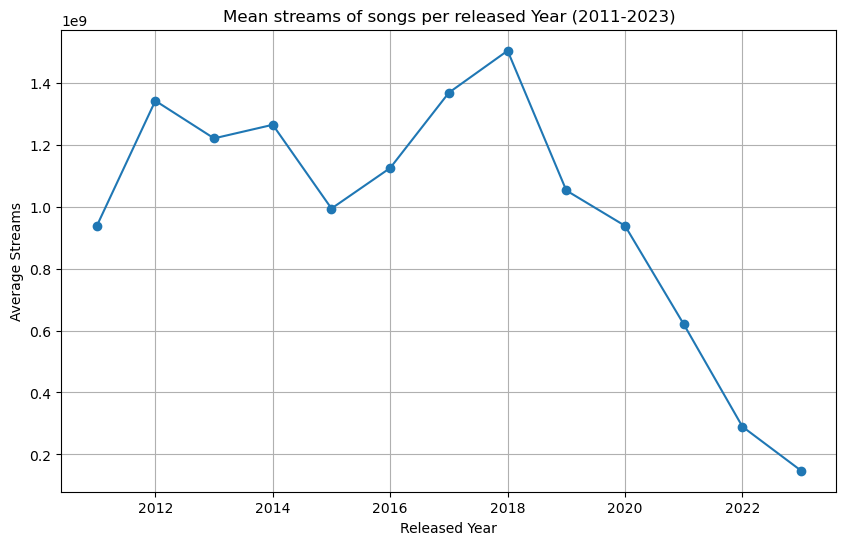

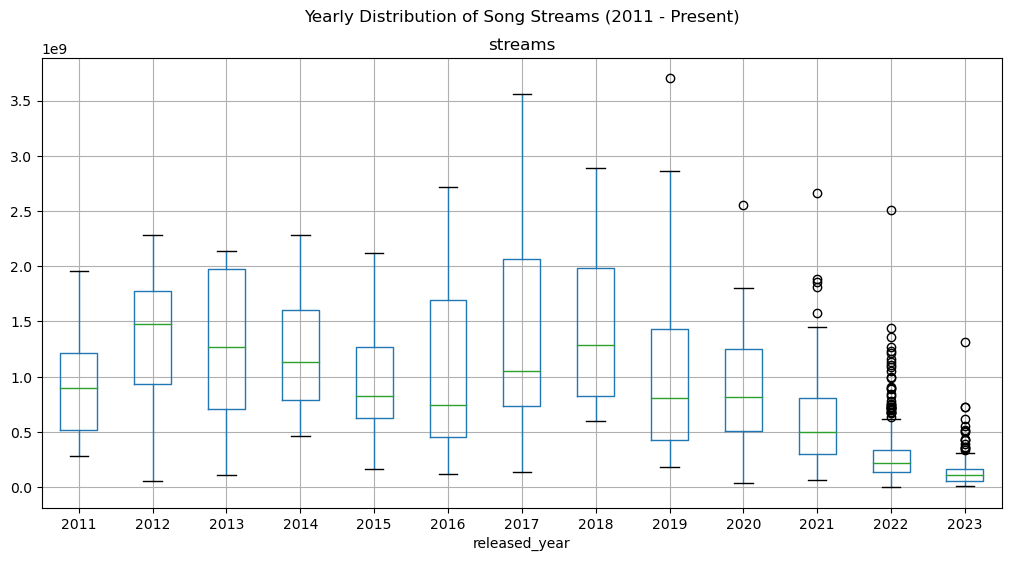

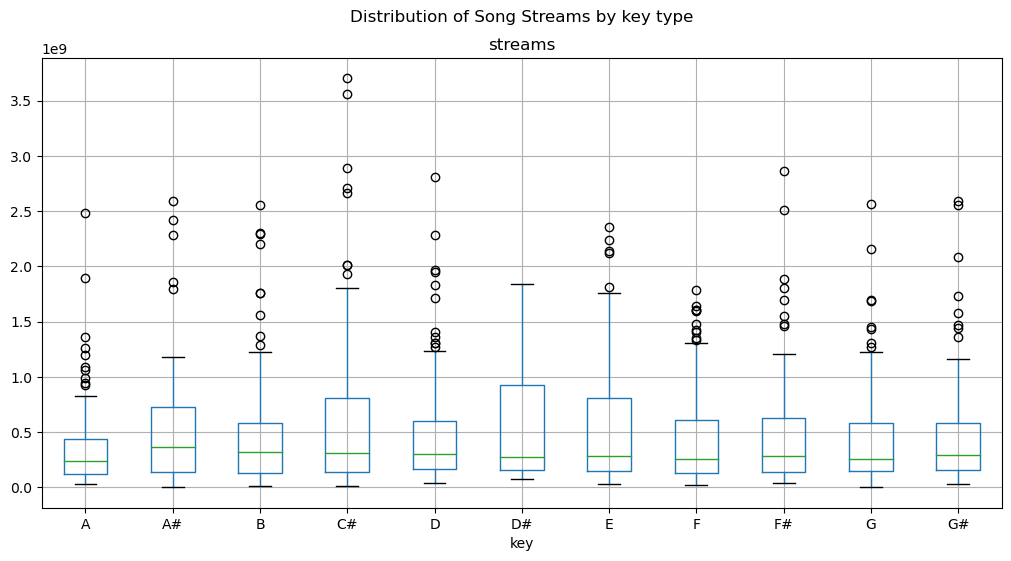

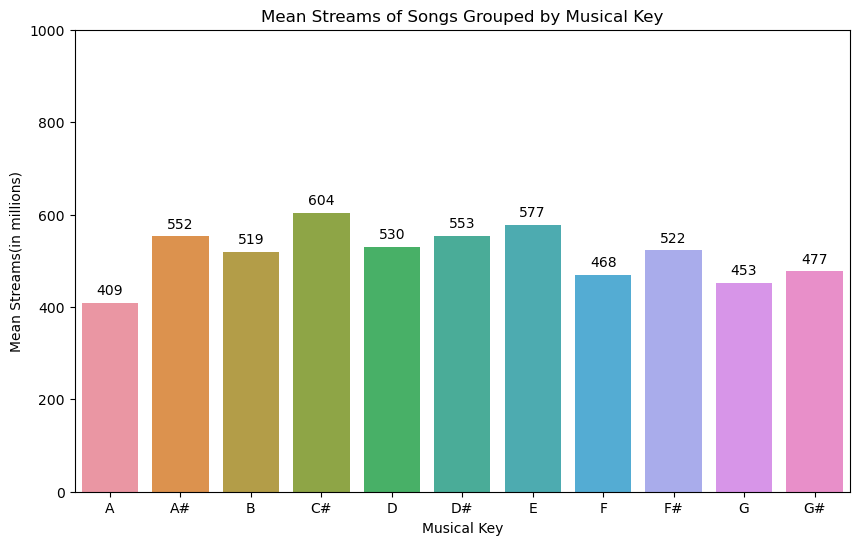

T-statistic: 1.325
P-value: 0.185


In [13]:
# Draw a line plot to represent the means of streams of songs grouped by released year.

df_recent = df_streams_to_int[df_streams_to_int['released_year'] > 2010]
mean_streams_by_year = df_recent.groupby('released_year')['streams'].mean()

plt.figure(figsize=(10, 6))
mean_streams_by_year.plot(kind='line', marker='o')
plt.title('Mean streams of songs per released Year (2011-2023)')
plt.xlabel('Released Year')
plt.ylabel('Average Streams')
plt.grid(True)
plt.show()



# Draw a boxplot to visualize the distribution of streams of songs released after 2010, grouped by released year.
df_streams_to_int[df_streams_to_int['released_year'] > 2010].boxplot(column="streams", by="released_year")
plt.suptitle('Yearly Distribution of Song Streams (2011 - Present)')

# Draw a boxplot to visualize the distribution of streams of songs grouped by key.
df_streams_to_int.boxplot(column="streams", by="key")
plt.suptitle('Distribution of Song Streams by key type')

# Draw a bar plot to represent the means of streams of songs grouped by key.
mean_streams_by_key = df_streams_to_int.groupby('key')['streams'].mean()
import seaborn as sns
plt.figure(figsize=(10, 6)) 
bar_plot = sns.barplot(x=mean_streams_by_key.index, y=(mean_streams_by_key.values/1000000))
plt.title('Mean Streams of Songs Grouped by Musical Key')
plt.xlabel('Musical Key')
plt.ylabel('Mean Streams(in millions)')
plt.ylim(0, 1000)
# Show the exact number above each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
plt.show()

from scipy import stats
# Perform a t-test comparing the stream of songs in Major mode to the stream of songs in Minor mode
major_streams = df_streams_to_int[df_streams_to_int['mode'] == 'Major']['streams']
minor_streams = df_streams_to_int[df_streams_to_int['mode'] == 'Minor']['streams']
ttest_result = stats.ttest_ind(major_streams, minor_streams, equal_var=False)
print(f"T-statistic: {ttest_result[0]:.3f}")
print(f"P-value: {ttest_result[1]:.3f}")

# Since the p-value of this t-test is greater than 0.05, we conclude that there is no significant difference between
# the stream number of songs in Marjor mode and the stream number of songs in Minor mode.